<a href="https://colab.research.google.com/github/HaruHoo/NUS_Project/blob/main/Copy_of_Group_two's_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and Prediction of China's Performance at the Olympic Games

## catagories





# Import  Package


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data


In [ ]:
filepath = "/content/drive/MyDrive/summer.csv"
filepath_gdp = "/content/drive/MyDrive/world_gdp.csv"
filepath_WP = "/content/drive/MyDrive/WorldPopulation.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(filepath)
df_GDP_old = pd.read_csv(filepath_gdp)
df_WP = pd.read_csv(filepath_WP)

# Explore Data
-  Quickly view the first five rows of the dataset

In [ ]:
df.head()                       #快速查看数据集的前五行

,ID,Name,Sex,Age,Height,Weight,Year,City,Sport,Event,region,Gold,Silver,Bronze,isTeam,国家及地区,城市,运动项目
0,1,A Dijiang,M,24.0,180.0,80.0,1992,Barcelona,Basketball,Basketball Men's Basketball,China,0,0,0,True,中国,巴塞罗那,篮球
1,2,A Lamusi,M,23.0,170.0,60.0,2012,London,Judo,Judo Men's Extra-Lightweight,China,0,0,0,False,中国,伦敦,柔道
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,1920,Antwerpen,Football,Football Men's Football,Denmark,0,0,0,True,丹麦,安特卫普,足球
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,1,0,0,True,丹麦,巴黎,拔河
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,1932,Los Angeles,Athletics,Athletics Women's 100 metres,Netherlands,0,0,0,False,荷兰,洛杉矶,田径


In [ ]:
df.shape           #查看数据集的维度

(218643, 18)

In [ ]:
df.columns        #查看数据集的列名

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'City', 'Sport',
       'Event', 'region', 'Gold', 'Silver', 'Bronze', 'isTeam', '国家及地区', '城市',
       '运动项目'],
      dtype='object')

In [ ]:
df.describe()            #查看数据集的统计摘要

,ID,Age,Height,Weight,Year,Gold,Silver,Bronze
count,218643.000000,210498.000000,170392.000000,168443.000000,218643.000000,218643.000000,218643.000000,218643.000000
mean,68002.350745,25.487463,175.511573,70.681839,1977.349670,0.051564,0.050361,0.051312
std,39151.614759,6.313956,10.919175,14.807708,30.168093,0.221145,0.218688,0.220634
min,1.000000,10.000000,127.000000,25.000000,1896.000000,0.000000,0.000000,0.000000
25%,34004.500000,21.000000,168.000000,60.000000,1960.000000,0.000000,0.000000,0.000000
50%,68310.000000,24.000000,175.000000,70.000000,1984.000000,0.000000,0.000000,0.000000
75%,101898.000000,28.000000,183.000000,79.000000,2000.000000,0.000000,0.000000,0.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000,1.000000,1.000000,1.000000


# Clean Data

In [ ]:
# 检查重复值
duplicates = df.duplicated()
if duplicates.any():
    print("数据集中存在重复值。")
else:
    print("数据集中没有重复值。")

数据集中没有重复值。


In [ ]:
# 检查缺失值
missing_values = df.isnull().sum()
if missing_values.any():
    print("数据集中存在缺失值。")
    print(missing_values)
else:
    print("数据集中没有缺失值。")

数据集中存在缺失值。
ID            0
Name          0
Sex           0
Age        8145
Height    48251
Weight    50200
Year          0
City          0
Sport         0
Event         0
region      370
Gold          0
Silver        0
Bronze        0
isTeam        0
国家及地区       370
城市            0
运动项目          0
dtype: int64


# 使用统计摘要查看异常值

In [ ]:
df.Name.nunique()

115170

In [ ]:
# 描述性统计
statistics = df.describe()
print(statistics)

                  ID            Age         Height         Weight  \
count  218643.000000  210498.000000  170392.000000  168443.000000   
mean    68002.350745      25.487463     175.511573      70.681839   
std     39151.614759       6.313956      10.919175      14.807708   
min         1.000000      10.000000     127.000000      25.000000   
25%     34004.500000      21.000000     168.000000      60.000000   
50%     68310.000000      24.000000     175.000000      70.000000   
75%    101898.000000      28.000000     183.000000      79.000000   
max    135568.000000      97.000000     226.000000     214.000000   

                Year           Gold         Silver         Bronze  
count  218643.000000  218643.000000  218643.000000  218643.000000  
mean     1977.349670       0.051564       0.050361       0.051312  
std        30.168093       0.221145       0.218688       0.220634  
min      1896.000000       0.000000       0.000000       0.000000  
25%      1960.000000       0.000000   

# Overview of China's Performance in Olympic Games 中国奥运表现历史回顾

### 筛选数据 [mandatory]

In [ ]:
chinese_players = df[df['region'] == 'China']

### 中国历届参赛人数

In [ ]:
# 统计总人数
chinese_players_per_year = chinese_players.groupby('Year')['Name'].nunique()

In [ ]:
chinese_players_per_year.head()

Year
1932     1
1936    54
1948    31
1952     5
1956     2
Name: Name, dtype: int64

## a.历届比赛的男性选手

In [ ]:
chinese_players_gender_per_year = chinese_players.groupby(['Year', 'Sex'])['Name'].nunique().unstack()
chinese_male_athletes = df[(df['region'] == 'China') & (df['Sex'] == 'M')]

# 统计男性选手总数
total_male_count = chinese_male_athletes['ID'].nunique()

print(f"中国男性选手总数：{total_male_count}")


print("中国每一届奥运会的男性选手人数：")
print(chinese_players_gender_per_year['M'])

中国男性选手总数：1341
中国每一届奥运会的男性选手人数：
Year
1932      1.0
1936     52.0
1948     30.0
1952      3.0
1956      2.0
1960      4.0
1964     38.0
1968     11.0
1972     10.0
1976     23.0
1984    168.0
1988    185.0
1992    145.0
1996    123.0
2000    109.0
2004    148.0
2008    322.0
2012    180.0
2016    165.0
Name: M, dtype: float64


## b.历届比赛的女性选手

In [ ]:
print("中国每一届奥运会的女性选手人数：")
chinese_female_athletes = df[(df['region'] == 'China') & (df['Sex'] == 'F')]

# 统计女性选手总数
total_female_count = chinese_female_athletes['ID'].nunique()

print(f"中国女性选手总数：{total_female_count}")
print(chinese_players_gender_per_year['F'])

中国每一届奥运会的女性选手人数：
中国女性选手总数：1329
Year
1932      NaN
1936      2.0
1948      1.0
1952      2.0
1956      NaN
1960      NaN
1964      1.0
1968      NaN
1972      NaN
1976      2.0
1984     94.0
1988    134.0
1992    137.0
1996    190.0
2000    189.0
2004    258.0
2008    302.0
2012    228.0
2016    262.0
Name: F, dtype: float64


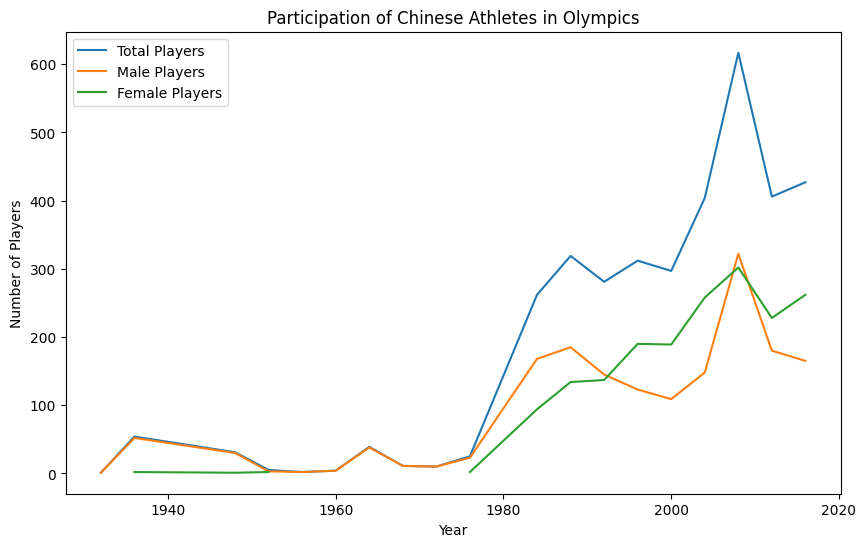

In [ ]:
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(chinese_players_per_year.index, chinese_players_per_year.values, label='Total Players')
plt.plot(chinese_players_gender_per_year.index, chinese_players_gender_per_year['M'], label='Male Players')
plt.plot(chinese_players_gender_per_year.index, chinese_players_gender_per_year['F'], label='Female Players')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.title('Participation of Chinese Athletes in Olympics')
plt.legend()
plt.show()

c. 男女选手比例

In [ ]:
# 计算总人数
total_count = total_male_count + total_female_count

# 计算男性和女性选手比例
male_ratio = total_male_count / total_count
female_ratio = total_female_count / total_count

print(f"男性选手比例：{male_ratio:.2%}")
print(f"女性选手比例：{female_ratio:.2%}")

男性选手比例：50.22%
女性选手比例：49.78%


## 中国参赛选手的男女比例

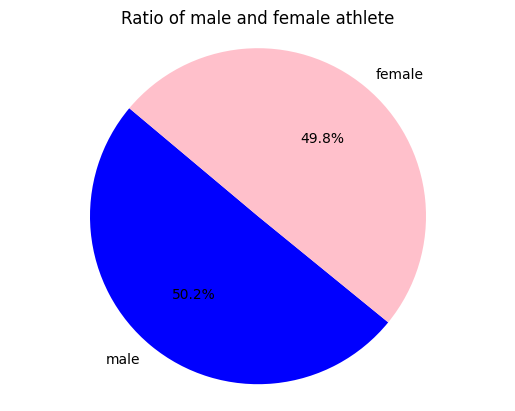

In [ ]:
ratios = [male_ratio, female_ratio]
labels = ['male', 'female']

# 绘制饼状图
plt.pie(ratios, labels=labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.axis('equal')  # 保持饼状图的纵横比相等
plt.title("Ratio of male and female athlete")
plt.show()

## 中国在历届奥运的个人项目中的得奖情况

In [ ]:
individual_events = chinese_players[chinese_players['isTeam'] == False]

In [ ]:
# 按照年份和项目进行分组，并计算每个组的奖牌总数
medals_per_year_event = individual_events.groupby(['Year', 'Event'])[['Gold', 'Silver', 'Bronze']].sum()

# 计算每年各项个人项目的奖牌总数
total_medals_per_year = medals_per_year_event.groupby('Year').sum()

# 打印每年各项个人项目的奖牌总数
print("各项个人项目每年获得的奖牌总数：")
print(total_medals_per_year)

各项个人项目每年获得的奖牌总数：
      Gold  Silver  Bronze
Year                      
1932     0       0       0
1936     0       0       0
1948     0       0       0
1952     0       0       0
1956     0       0       0
1960     0       0       0
1964     0       0       0
1968     0       0       0
1972     0       0       0
1976     0       0       0
1984    14       7       6
1988     4       9      10
1992    14      16      13
1996    14      14       9
2000    21      10      12
2004    22      13      13
2008    40      13      20
2012    27      22      22
2016    18      15      21


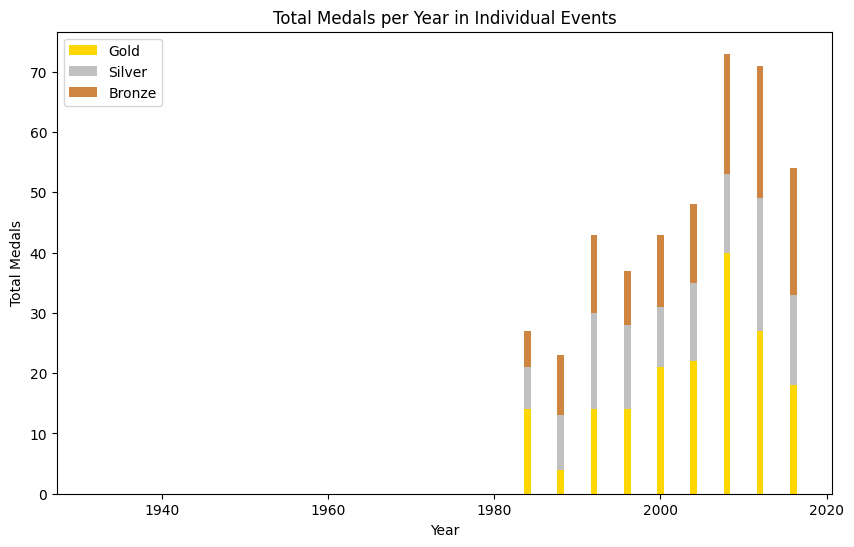

In [ ]:
# 绘制堆叠柱状图
plt.figure(figsize=(10, 6))
plt.bar(total_medals_per_year.index, total_medals_per_year['Gold'], label='Gold', color='gold')
plt.bar(total_medals_per_year.index, total_medals_per_year['Silver'], bottom=total_medals_per_year['Gold'], label='Silver', color='silver')
plt.bar(total_medals_per_year.index, total_medals_per_year['Bronze'], bottom=total_medals_per_year['Gold']+total_medals_per_year['Silver'], label='Bronze', color='peru')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Total Medals per Year in Individual Events')
plt.legend()
plt.show()

In [ ]:
# 按照运动进行分组，并计算总奖牌数
total_medals_per_sport = individual_events.groupby('Sport')[['Gold', 'Silver', 'Bronze']].sum().reset_index()

# 计算总奖牌数的和列
total_medals_per_sport['Total Medals'] = total_medals_per_sport['Gold'] + total_medals_per_sport['Silver'] + total_medals_per_sport['Bronze']

# 按照总奖牌数降序排序
top_5_sports = total_medals_per_sport.sort_values('Total Medals', ascending=False).head(5)

In [ ]:
# 打印表现最好的五个运动
print("中国个人项目中表现最好的五个运动：")
print(top_5_sports[['Sport', 'Total Medals']])

中国个人项目中表现最好的五个运动：
            Sport  Total Medals
25  Weightlifting            57
17       Shooting            56
11     Gymnastics            51
7          Diving            50
18       Swimming            36


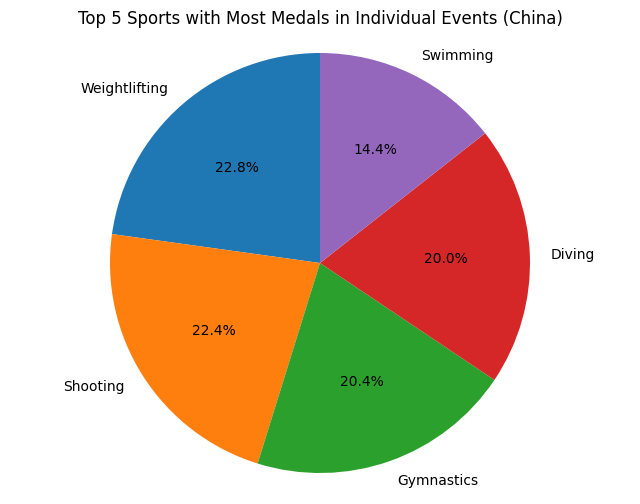

In [ ]:
# 提取运动名称和总奖牌数
sports = top_5_sports['Sport']
medal_counts = top_5_sports['Total Medals']

# 绘制饼图
plt.figure(figsize=(8, 6))
plt.pie(medal_counts, labels=sports, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Sports with Most Medals in Individual Events (China)')
plt.axis('equal')
plt.show()

In [ ]:
# 筛选出过去五届奥运会的数据（2000年至2016年）
recent_olympics = individual_events[individual_events['Year'].between(2000, 2016)]

# 按照运动和年份进行分组，并计算每个组的奖牌总数
medals_per_sport_year = recent_olympics.groupby(['Sport', 'Year'])[['Gold', 'Silver', 'Bronze']].sum().reset_index()

# 筛选出前五个强项运动在过去五届奥运会中的数据
top_5_sports_data = medals_per_sport_year[medals_per_sport_year['Sport'].isin(top_5_sports['Sport'])]
# 计算每个运动在每个年份的总奖牌数
total_medals_per_year_sport = top_5_sports_data.groupby(['Year', 'Sport'])[['Gold', 'Silver', 'Bronze']].sum().reset_index()
total_medals_per_year_sport['Total Medals'] = total_medals_per_year_sport['Gold'] + total_medals_per_year_sport['Silver'] + total_medals_per_year_sport['Bronze']


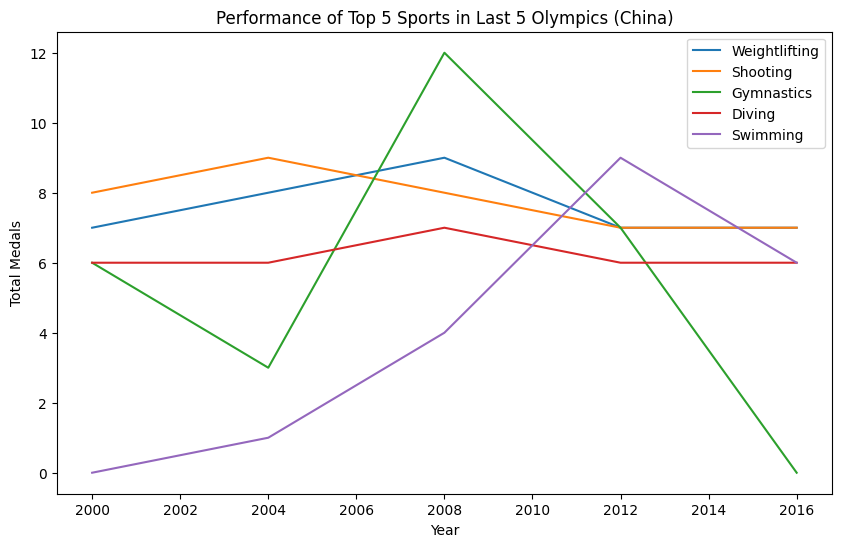

In [ ]:
# 绘制折线图
plt.figure(figsize=(10, 6))
for sport in top_5_sports['Sport']:
  sport_data = total_medals_per_year_sport[total_medals_per_year_sport['Sport'] == sport]
  plt.plot(sport_data['Year'], sport_data['Total Medals'], label=sport)
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Performance of Top 5 Sports in Last 5 Olympics (China)')
plt.legend()
plt.show()

## 中国在历届奥运的团体项目中的得奖情况

In [ ]:
team_events = chinese_players[chinese_players['isTeam'] == True]
# 按照年份和项目进行分组，并计算每个组的奖牌总数
medals_per_year_event = team_events.groupby(['Year', 'Event'])[['Gold', 'Silver', 'Bronze']].sum()

# 计算每年各项团体项目的奖牌总数
total_medals_per_year = medals_per_year_event.groupby('Year').sum()

# 打印每年各项团体项目的奖牌总数
print("各项团体项目每年获得的奖牌总数：")
print(total_medals_per_year)

各项团体项目每年获得的奖牌总数：
      Gold  Silver  Bronze
Year                      
1936     0       0       0
1948     0       0       0
1964     0       0       0
1968     0       0       0
1972     0       0       0
1976     0       0       0
1984    10       6      31
1988     2       7      20
1992     4      29       6
1996     6      56       8
2000    18      13       5
2004    30      16       2
2008    34      40      37
2012    29      18       8
2016    28      15      16


In [ ]:
# 按照运动进行分组，并计算总奖牌数和参赛次数
medal_counts_per_sport = individual_events.groupby('Sport')[['Gold', 'Silver', 'Bronze']].sum()
participation_counts_per_sport = individual_events['Sport'].value_counts()

# 合并奖牌数和参赛次数数据
sport_performance = pd.merge(medal_counts_per_sport, participation_counts_per_sport, left_index=True, right_index=True)
sport_performance.rename(columns={'Sport': 'Participation Count'}, inplace=True)

# 找出得奖最少的项目中参赛次数最多的项目
worst_performance = sport_performance[sport_performance['Gold'] + sport_performance['Silver'] + sport_performance['Bronze'] == sport_performance[['Gold', 'Silver', 'Bronze']].min(axis=1)]
worst_performance = worst_performance[worst_performance['Participation Count'] == worst_performance['Participation Count'].max()]

# 打印表现最差的运动
print("中国在以下运动中表现最差：")
print(worst_performance.index.tolist())

中国在以下运动中表现最差：
['Canoeing']


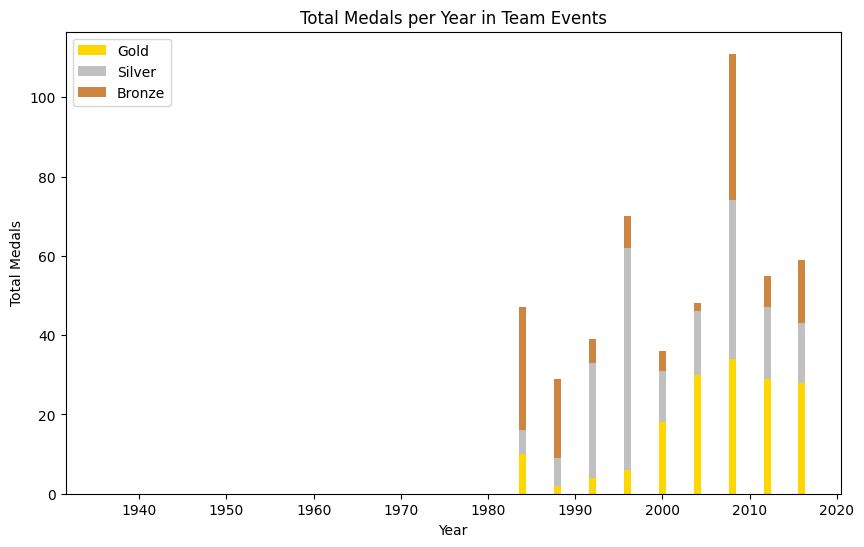

In [ ]:
# 绘制堆叠柱状图
plt.figure(figsize=(10, 6))
plt.bar(total_medals_per_year.index, total_medals_per_year['Gold'], label='Gold', color='gold')
plt.bar(total_medals_per_year.index, total_medals_per_year['Silver'], bottom=total_medals_per_year['Gold'], label='Silver', color='silver')
plt.bar(total_medals_per_year.index, total_medals_per_year['Bronze'], bottom=total_medals_per_year['Gold']+total_medals_per_year['Silver'], label='Bronze', color='peru')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Total Medals per Year in Team Events')
plt.legend()
plt.show()

# Prediction of China's medal tally in the Olympic Games

In [ ]:
# Filter data from 1980 onwards
chinese_players_1980+ = chinese_players[chinese_players['Year'] >= 1980]

# GDP Analyze





In [ ]:
df_GDP_old.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,Last Updated Date,25/1/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1.965000e+03,...,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2017.0
3,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.0,548888896.0,546666678.0,751111191.0,800000044.0,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10,NaN
4,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN


In [ ]:
df_GDP = df_GDP_old.iloc[2:]


In [ ]:
CHN_GDP = df_GDP[df_GDP['World Development Indicators'].str.contains('CHN', case=False)]

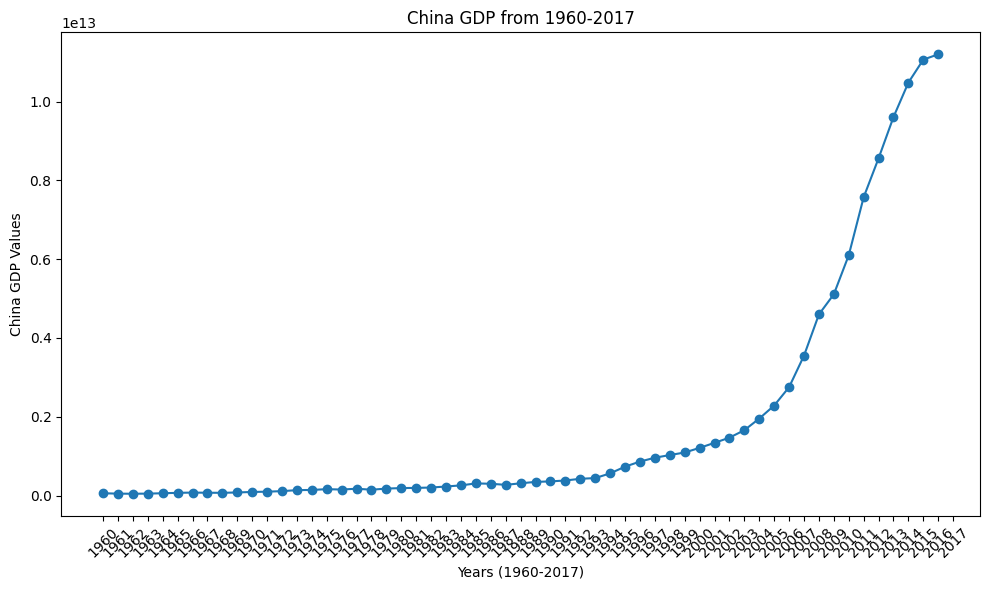

In [ ]:
#显示GDP趋势
CHN_GDP_data1 = CHN_GDP.iloc[0,4:]
#print(CHN_GDP_data1)
years = range(1960, 2018)
plt.figure(figsize=(10, 6))
plt.plot(CHN_GDP_data1, marker='o')
plt.xlabel('Years (1960-2017)')
plt.ylabel('China GDP Values')
plt.title('China GDP from 1960-2017')
plt.xticks(range(len(years)), years, rotation=45)
plt.tight_layout()
plt.show()

未来趋势预测结果：
[1.96009161e+13 3.86972204e+13 5.73019039e+13 7.54276229e+13
 9.30867081e+13 1.10291173e+14 1.27052720e+14 1.43382754e+14
 1.59292382e+14 1.74792429e+14]
预测置信区间：
[[1.65952377e+13 2.26065944e+13]
 [2.98564995e+13 4.75379413e+13]
 [4.11765597e+13 7.34272480e+13]
 [5.08678413e+13 9.99874046e+13]
 [5.91410762e+13 1.27032340e+14]
 [6.61500027e+13 1.54432343e+14]
 [7.20142951e+13 1.82091146e+14]
 [7.68313325e+13 2.09934176e+14]
 [8.06828785e+13 2.37901886e+14]
 [8.36391898e+13 2.65945668e+14]]


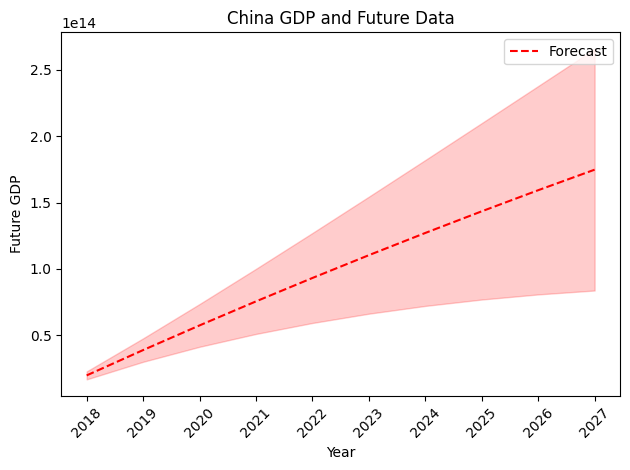

In [ ]:
#对GDP进行预测
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 拟合ARIMA模型
p = 1  # AR阶数
d = 1  # 差分阶数
q = 1  # MA阶数

CHN_GDP_data1 = CHN_GDP_data1.fillna(0)

# 将数据转换为NumPy数组
CHN_GDP_data = np.asarray(-CHN_GDP_data1, dtype=np.float64)
model = ARIMA(CHN_GDP_data, order=(p, d, q))
model_fit = model.fit()

# 进行未来预测
future_steps = 10  # 预测未来的步数
forecast = model_fit.get_forecast(steps=future_steps)

# 获取预测结果和置信区间
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

print("未来趋势预测结果：")
print(forecast_mean)
print("预测置信区间：")
print(forecast_conf_int)

# 绘制预测结果折线图
plt.plot(range(2018, 2018 + future_steps), forecast_mean, color='red', linestyle='dashed', label='Forecast')
plt.fill_between(range(2018, 2018 + future_steps), forecast_conf_int[:, 0], forecast_conf_int[:, 1], color='red', alpha=0.2)

plt.xlabel('Year')
plt.ylabel('Future GDP')
plt.title('China GDP and Future Data')
plt.xticks(list(range(2018, 2018 + future_steps)), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()